In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Datasets/bbc_news_20220307_20240703.csv.zip')
df.head(5)

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
stop_words = set(stopwords.words('english')+ ['cant','dont','even','get','go','going'
,'im','ive','like','really','want','also','anyone','back','would','things','one','much',
'feeling', 'got', 'know', 'never', 'since','always','something','started','still','take',
'anything', 'could', 'getting','last','think','else','every','everything','lot','make','way'
,'ago','better','didnt','see','someone','went','well','thoughts','well','trying',
'first','right','thought','person', 'ever', 'self', 'without', 'best', 'looking','day', 'ever ', 'broke', 'without', 'best', 'looking',
'ever','said', 'shes', 'hes', 'made', 'talk', 'tell', 'thing', 'days', 'away', 'around', 'try',
'thats','times','saying','wasnt','doesnt','say','wanted','nothing','anymore','keep','two','point','let','makes','asked','talking',
'normal','actually','come','sure','many','done','find','though','end','left','deal','maybe','stop','give','whats',
'etc', 'almost', 'little', 'everyone','tired','long', 'post','id','able','another','the', 'the ', ' the', ' the ', "says"])

punctuations = "!\"#$%&()*,-./:;<=>?@[\\]^_`{|}~'"

pattern = r'\b(?:' + '|'.join(stop_words) + r')\b'

In [6]:
df['title_cleaned'] = df['title'].str.lower()
df['description_cleaned'] = df['description'].str.lower()

In [10]:
df['title_cleaned'] = df['title_cleaned'].str.replace(pattern, '', regex=True)
df['description_cleaned'] = df['description_cleaned'].str.replace(pattern, '', regex=True)

In [11]:
df['title_cleaned'] = df['title_cleaned'].str.replace(f"[{punctuations}]", ' ', regex=True)
df['description_cleaned'] = df['description_cleaned'].str.replace(f"[{punctuations}]", ' ', regex=True)

In [12]:
df['pubDate'] = pd.to_datetime(df['pubDate']).dt.date

In [13]:
df.head(5)

,title,pubDate,guid,link,description,title_cleaned,description_cleaned
0,Ukraine: Angry Zelensky vows to punish Russian...,2022-03-07,https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,ukraine angry zelensky vows punish russian a...,ukrainian president country forgive forget ...
1,War in Ukraine: Taking cover in a town under a...,2022-03-06,https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",war ukraine taking cover town attack,jeremy bowen frontline irpin residents cam...
2,Ukraine war 'catastrophic for global food',2022-03-07,https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,ukraine war catastrophic global food,world biggest fertiliser firms conflict del...
3,Manchester Arena bombing: Saffie Roussos's par...,2022-03-07,https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,manchester arena bombing saffie roussos pare...,parents manchester arena bombing youngest vic...
4,Ukraine conflict: Oil price soars to highest l...,2022-03-07,https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,ukraine conflict oil price soars highest lev...,consumers impact higher energy costs fuel p...


In [14]:
# CountVectorizer is used to convert text data into numerical data

from sklearn.feature_extraction.text import CountVectorizer

In [15]:
count_vectorizer_title = CountVectorizer(max_features=1000)
counter_vec_title = count_vectorizer_title.fit_transform(df['title_cleaned'])

count_vectorizer_description = CountVectorizer(max_features=1000)
counter_vec_description = count_vectorizer_description.fit_transform(df['description_cleaned'])

In [16]:
# now titles(title_cleaned) and descriptions(descriptions_cleaned) are clustered using KMeans algo

from sklearn.cluster import KMeans

In [19]:
k=5
kmeans_title = KMeans(n_clusters=k, random_state=37)
kmeans_title.fit(counter_vec_title)
df['title_cluster'] = kmeans_title.labels_

kmeans_description = KMeans(n_clusters=k, random_state=37)
kmeans_description.fit(counter_vec_description)
df['description_cluster'] = kmeans_description.labels_

df.head(5)

,title,pubDate,guid,link,description,title_cleaned,description_cleaned,title_cluster,description_cluster
0,Ukraine: Angry Zelensky vows to punish Russian...,2022-03-07,https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,ukraine angry zelensky vows punish russian a...,ukrainian president country forgive forget ...,4,1
1,War in Ukraine: Taking cover in a town under a...,2022-03-06,https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",war ukraine taking cover town attack,jeremy bowen frontline irpin residents cam...,4,1
2,Ukraine war 'catastrophic for global food',2022-03-07,https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,ukraine war catastrophic global food,world biggest fertiliser firms conflict del...,4,2
3,Manchester Arena bombing: Saffie Roussos's par...,2022-03-07,https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,manchester arena bombing saffie roussos pare...,parents manchester arena bombing youngest vic...,2,1
4,Ukraine conflict: Oil price soars to highest l...,2022-03-07,https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,ukraine conflict oil price soars highest lev...,consumers impact higher energy costs fuel p...,4,1


In [20]:
# listed the most important terms at the center of each title's cluster

cluster_center_title = kmeans_title.cluster_centers_.argsort()[:, ::-1]
terms_title = count_vectorizer_title.get_feature_names_out()

for i in range(k):
    print("Title " + f"Cluster {i}:")
    for ind in cluster_center_title[i, :5]:
        #printed the importance and weight of each terms
        print(terms_title[ind] + " (weight: " + str(cluster_center_title[i, ind] * 0.001) + ")")
    
    print("\n")

Title Cluster 0:
uk (weight: 0.213)
inflation (weight: 0.163)
rate (weight: 0.35100000000000003)
weather (weight: 0.28300000000000003)
rising (weight: 0.46)


Title Cluster 1:
world (weight: 0.5760000000000001)
cup (weight: 0.842)
2022 (weight: 0.6910000000000001)
england (weight: 0.365)
women (weight: 0.543)


Title Cluster 2:
england (weight: 0.1)
new (weight: 0.183)
us (weight: 0.107)
man (weight: 0.198)
win (weight: 0.855)


Title Cluster 3:
cup (weight: 0.09)
fa (weight: 0.117)
final (weight: 0.384)
united (weight: 0.6930000000000001)
city (weight: 0.712)


Title Cluster 4:
ukraine (weight: 0.772)
war (weight: 0.733)
russia (weight: 0.8160000000000001)
russian (weight: 0.608)
putin (weight: 0.64)




In [21]:
# listed the most important terms at the center of each title's cluster

cluster_center_description = kmeans_description.cluster_centers_.argsort()[:, ::-1]
terms_description = count_vectorizer_description.get_feature_names_out()

for i in range(k):
    print("Description " + f"Cluster {i}:")
    for ind in cluster_center_title[i, :5]:
        #printed the importance and weight of each terms
        print(terms_description[ind] + " (weight: " + str(cluster_center_description[i, ind] * 0.001) + ")")
    
    print("\n")

Description Cluster 0:
turn (weight: 0.619)
huge (weight: 0.87)
radio (weight: 0.805)
wednesday (weight: 0.523)
results (weight: 0.723)


Description Cluster 1:
work (weight: 0.47900000000000004)
convicted (weight: 0.16)
2019 (weight: 0.759)
earlier (weight: 0.27)
winter (weight: 0.158)


Description Cluster 2:
earlier (weight: 0.003)
national (weight: 0.183)
union (weight: 0.721)
longer (weight: 0.852)
wife (weight: 0.6960000000000001)


Description Cluster 3:
convicted (weight: 0.09)
energy (weight: 0.666)
falling (weight: 0.069)
ukraine (weight: 0.639)
chris (weight: 0.43)


Description Cluster 4:
turned (weight: 0.461)
warn (weight: 0.92)
role (weight: 0.893)
rory (weight: 0.911)
private (weight: 0.631)




In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

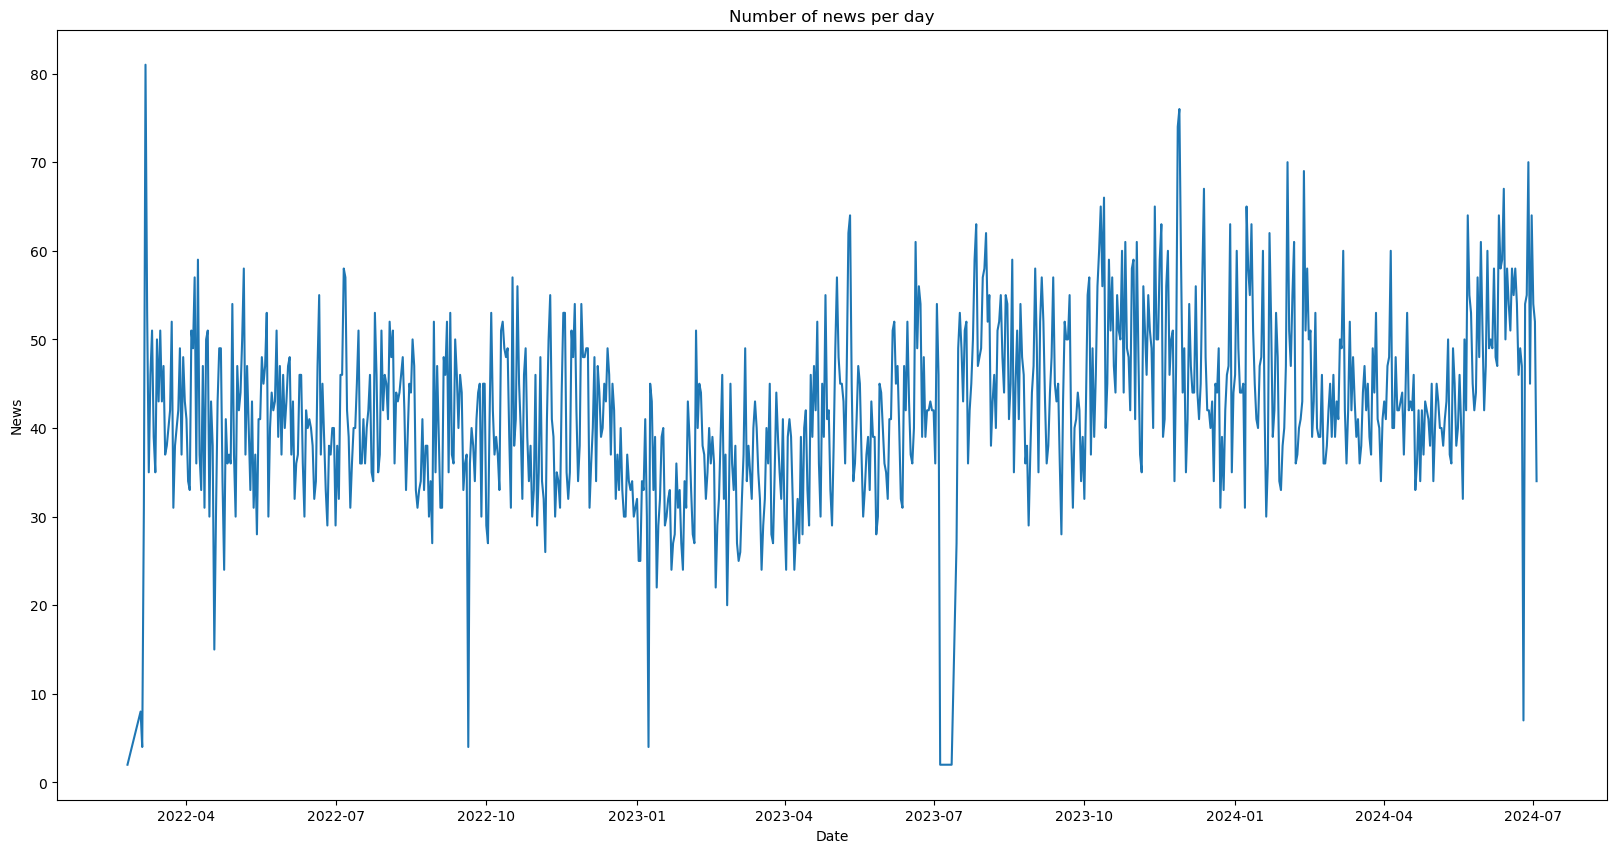

In [23]:
date_counts = df['pubDate'].value_counts().sort_index()
filtered_date = date_counts[date_counts > 1]

plt.figure(figsize=(20,10))
plt.plot(filtered_date.index, filtered_date.values)
plt.title("Number of news per day")
plt.xlabel("Date")
plt.ylabel("News")
plt.show()

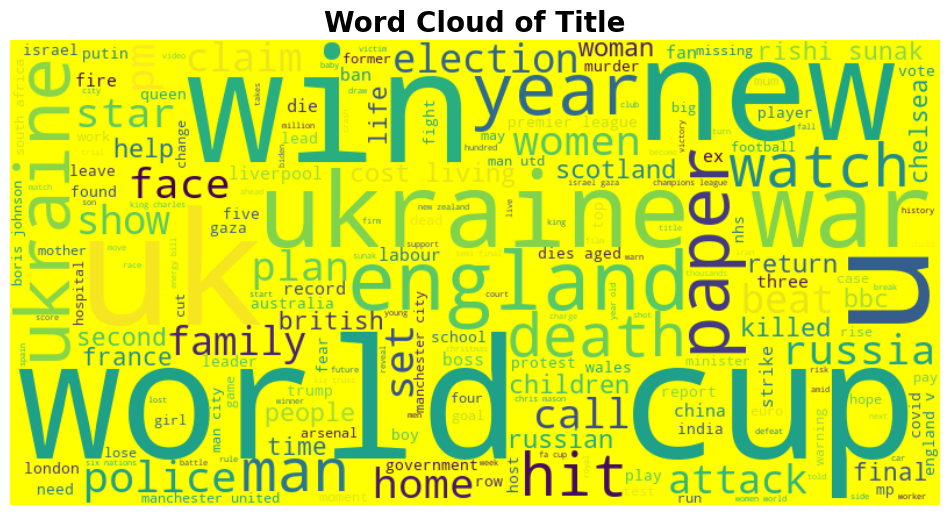

In [26]:
# wordcloud

from wordcloud import WordCloud

words = ' '.join(df['title_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color = 'yellow').generate(words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Title', weight = 'bold', size = 20)
plt.axis('off')
plt.show()

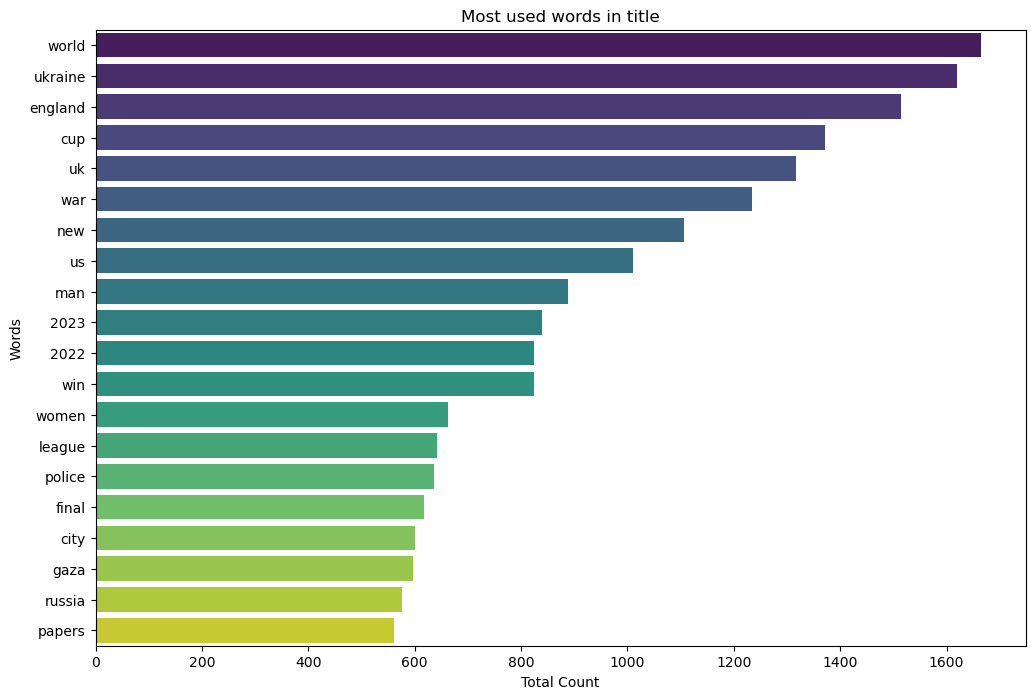

In [29]:
# total count of each word will be calculated

word_sum_title = np.array(counter_vec_title.sum(axis=0)).flatten()
terms_title = count_vectorizer_title.get_feature_names_out()
df_words_title = pd.DataFrame({'word':terms_title, 'total_count': word_sum_title})
df_words_title = df_words_title.sort_values(by='total_count', ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.barplot(x='total_count', y = 'word', data=df_words_title, palette='viridis')
plt.title("Most used words in title")
plt.xlabel("Total Count")
plt.ylabel("Words")
plt.show()

In [ ]:
# bigrams from preprocessed title

bigram_vectorizer_title = CountVectorizer(ngram_range=(2,2))
X_bigram_title = 